In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import cmocean
import xarray as xa

import sys,os
testdir = os.path.dirname(os.getcwd() + '/')
srcdir = '..'
sys.path.insert(0, os.path.abspath(os.path.join(testdir, srcdir)))

from wave_tracing import Wave_tracing
import util_solvers as uts

%matplotlib inline

In [2]:
def snells_law_current(phi_0, U, c0):
    # Note - critical when phi = pi/2
    
    phi_0 = np.deg2rad(phi_0)
    rhs = ((np.sin(phi_0)) / (1 - (U/c0) * np.sin(phi_0))**2)
    #print(U/c0, rhs)
    phi = np.arcsin(rhs )
    return phi

In [3]:
np.rad2deg(snells_law_current(phi_0=50.2562,U=2,c0=12.49))
np.rad2deg(snells_law_current(phi_0=90-39.7439,U=2,c0=12.49))

89.8881118324066

In [4]:
90-50.2562

39.7438

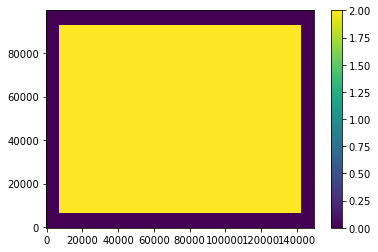

In [5]:
# The current field
Lx = 150000 # m
Ly = 100000 # m

ny, nx = (150,200)
delta = 10

dy = Ly/ny #m
dx = Lx/nx #m

Umax = 2 #m/s

x = np.arange(nx)*dx
y = np.arange(ny)*dy
#y = np.arange(-delta, ny-delta,1)*dy
u = np.zeros((ny,nx))
v = u.copy()

# Create a vertical current profile
y_half = int(y.size/2)
y_0 = delta

U_y = np.linspace(0,Umax,y_half-y_0)

#y[y_0:y_half] = 3


#vertical_velocity_profile = np.sin(np.linspace(0,np.pi,len(y[y>0])))
#s = 1/y.max()
#vertical_velocity_profile = s*y[y>0]

for i in range(10,nx-10):
#for i in range(0,nx):
    
    #u[y_0:y_half,i] = U_y
    #u[y_half:-delta,i] = U_y[::-1]
    
    u[y_0:y_half,i] = Umax
    u[y_half:-delta,i] = Umax


fig,ax = plt.subplots()
pc = ax.pcolormesh(x,y,u,shading='auto')
cbar=fig.colorbar(pc)




In [6]:
# Compute the wave rays

nb_wave_rays = 10

T = 3800*1
print("T={}h".format(T/3600))
nt = 4000
wave_period = 8
theta0 = np.deg2rad(37.9) #np.pi/8 #np.pi/4

X0, XN = x[0], x[-1]
Y0, YN = y[0], y[-1]

solver = uts.RungeKutta4

wt = Wave_tracing(u, v, nx, ny, nt,T,dx,dy, wave_period, theta0,nb_wave_rays=nb_wave_rays,
                domain_X0=X0, domain_XN=XN,
                domain_Y0=Y0, domain_YN=YN, 
                incoming_wave_side='left',)

wt.set_initial_condition()
wt.solve(solver=solver)

x_rd,y_rd,hm = wt.ray_density(5,5, plot=False)


T=1.0555555555555556h


/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: overflow encountered in sinh
  result_data = func(*input_data)
/home/trygveh/anaconda3/envs/wave_tracing/lib/python3.9/site-packages/xarray/core/computation.p

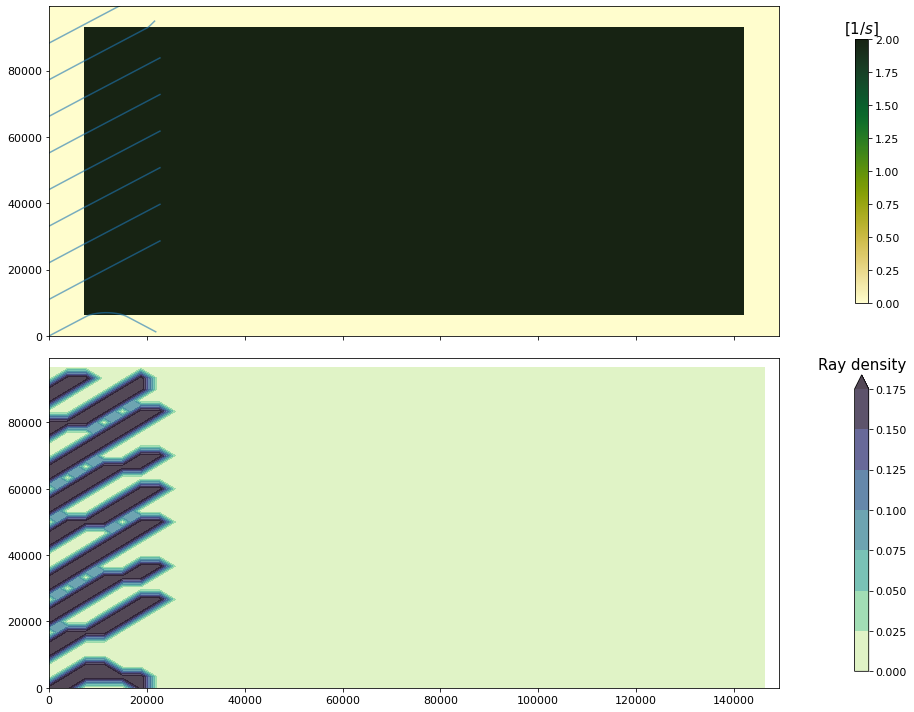

In [7]:
# PLOTTING

vorticity = wt.dvdx-wt.dudy
speed = np.sqrt(u**2 + v**2)

fs=15
fig,ax = plt.subplots(nrows=2,figsize=(14,10),sharex=True,sharey=True)
#pc=ax[0].pcolormesh(x,y,vorticity[0],cmap=cmocean.cm.curl,vmax=1e-7,vmin=-1e-7)
pc=ax[0].pcolormesh(x,y,speed,cmap=cmocean.cm.speed,vmax=Umax,vmin=0,shading='auto')
#qu=ax[0].quiver(x[::2],y[::2],u[::2,::2],v[::2,::2],color='r', scale=12)

for i in range(0,wt.nb_wave_rays):
    ax[0].plot(wt.xr[i,:],wt.yr[i,:],'-',c='tab:blue',alpha=0.6)
ax[0].set_xlim([X0,XN])
ax[0].set_ylim([Y0,YN])

density = ax[1].contourf(x_rd,y_rd,hm/5,extend='max',
                         cmap=cmocean.cm.deep,alpha=0.8)


cb0 = fig.colorbar(pc,ax=ax[0],orientation='vertical',extend='neither',shrink=0.8, pad=0.08)
cb0.ax.set_title(r'$[1/s]$',fontsize=fs)
cb1 = fig.colorbar(density,ax=ax[1],orientation='vertical',shrink=0.9, pad=0.08)
cb1.ax.set_title(r'Ray density',fontsize=fs)

fig.tight_layout()
ax[0].tick_params(axis='both',labelsize=fs-4)
ax[1].tick_params(axis='both',labelsize=fs-4)
cb0.ax.tick_params(labelsize=fs-4)
cb1.ax.tick_params(labelsize=fs-4)

In [9]:
(1 - theta0/np.deg2rad(39.7439))*100

4.639454104906671

In [10]:
theta0-np.deg2rad(39.7439)

-0.032182126077523465

In [239]:
dt = T/nt
dx = Lx/nx
dt/dx

0.0016888888888888889

In [108]:
90-55

35

In [259]:
phi0 = theta0# direction of the wave number whwere the current vanish

In [260]:
idxr = 0
(nx-50)*dx
id_phi0 = wt.find_nearest(wt.xr[idxr,:],(nx-50)*dx)
phi = wt.theta[idxr,id_phi0]# direction of the wave number whwere the current vanish

print(wt.xr[idxr,0],wt.yr[idxr,0])
print(wt.xr[idxr,id_phi0],wt.yr[idxr,id_phi0])

print(wt.kx[idxr,0],wt.ky[idxr,0])
print(wt.kx[idxr,id_phi0],wt.ky[idxr,id_phi0])

print(wt.theta[idxr,0],wt.theta[idxr,id_phi0])

0.0 -1500.0
15006.331467997366 3203.4098560370376
0.037179716616308964 0.01540034286766349
0.038923330044685706 0.006688804530014368
0.39269908169872414 0.1679365617327819


In [261]:
phi-phi0

-0.22476251996594224

In [250]:
#c0 = wt.c_intrinsic(wt.k[0,id_phi0],group_velocity=False)
c0 = wt.c_intrinsic(wt.k[0,0],group_velocity=False)
print(wt.c_intrinsic(wt.k[0,0],group_velocity=False))
print(c0)

15.613099917314935
15.613099917314935


In [262]:
print(np.sin(phi0)/np.sin(phi))


2.2894844829190775


In [280]:
idy_tmp=wt.find_nearest(wt.yr[idr,id_phi0],y)
idx_tmp=wt.find_nearest(wt.xr[idr,id_phi0],x)
U = u[idx_tmp,idy_tmp]

(1-(U/c0)*np.sin(phi0))**2

IndexError: index 150 is out of bounds for axis 0 with size 75

In [284]:
wt.xr[idr,id_phi0]


15006.331467997366

In [181]:
g = 9.81
R0 = -g/(2*s*(np.sqrt(g*wt.k[0,0])))
R0

-46058.64475607905

(-1500.0, 5900.0)

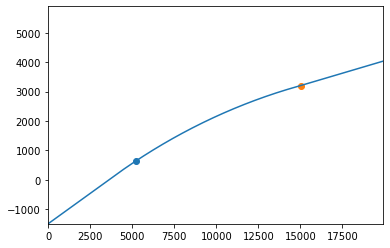

In [285]:
#plt.plot(wt.kx[50],wt.ky[50],'o')
idr = 0
fig,ax = plt.subplots()
ax.plot(wt.xr[idr],wt.yr[idr],'-')
ax.scatter(wt.xr[idr,200],wt.yr[idr,200])
ax.scatter(wt.xr[idr,id_phi0],wt.yr[idr,id_phi0])
ax.set_xlim([X0,XN])
ax.set_ylim([Y0,YN])

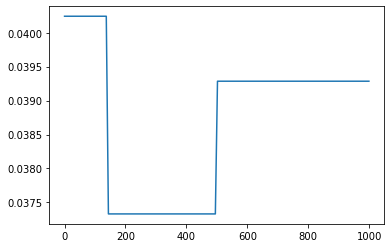

In [235]:
plt.plot(wt.kx[idr,:])

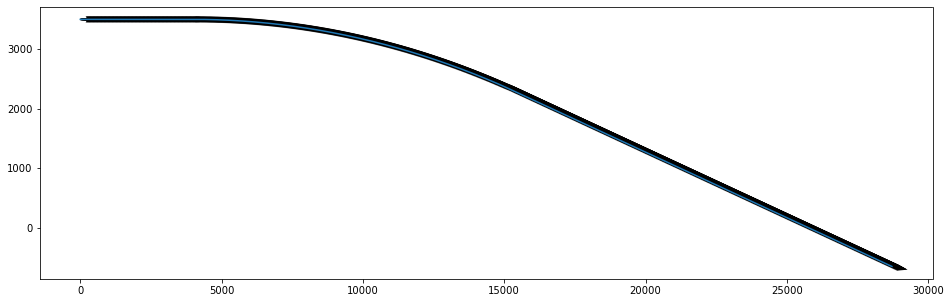

In [208]:
fig,ax = plt.subplots(figsize=(16,5))
ax.plot(wt.xr[50],wt.yr[50])
ax.quiver(wt.xr[50],wt.yr[50],wt.kx[50],wt.ky[50])
#ax.set_xlim([7500,15000])
#ax.set_ylim([2300,3500])

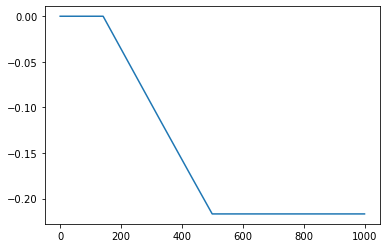

In [209]:
plt.plot(wt.theta[50])